# Quick examples
This notebook contains a number of quick examples to demonstrate PyJobShop features not contained in the other notebooks.

In [1]:
from pyjobshop import Model, plot

## Sequence-dependent setup times
Machines may require different configuration settings for processing different types of tasks. This results in _sequence-dependent setup times_, which is the time that is required to reconfigure machines between processing two tasks. Let's showcase a small example here.

In [2]:
model = Model()
tasks = [model.add_task(name=idx) for idx in range(6)]
machines = [model.add_machine(name=idx) for idx in range(2)]

for task in tasks:
    # The first machine is faster than the second machine.
    model.add_processing_time(task, machines[0], duration=1)
    model.add_processing_time(task, machines[1], duration=3)

for task1 in tasks:
    for task2 in tasks:
        model.add_setup_time(machines[0], task1, task2, duration=1)
        model.add_setup_time(machines[1], task1, task2, duration=2)

result = model.solve(display=False)

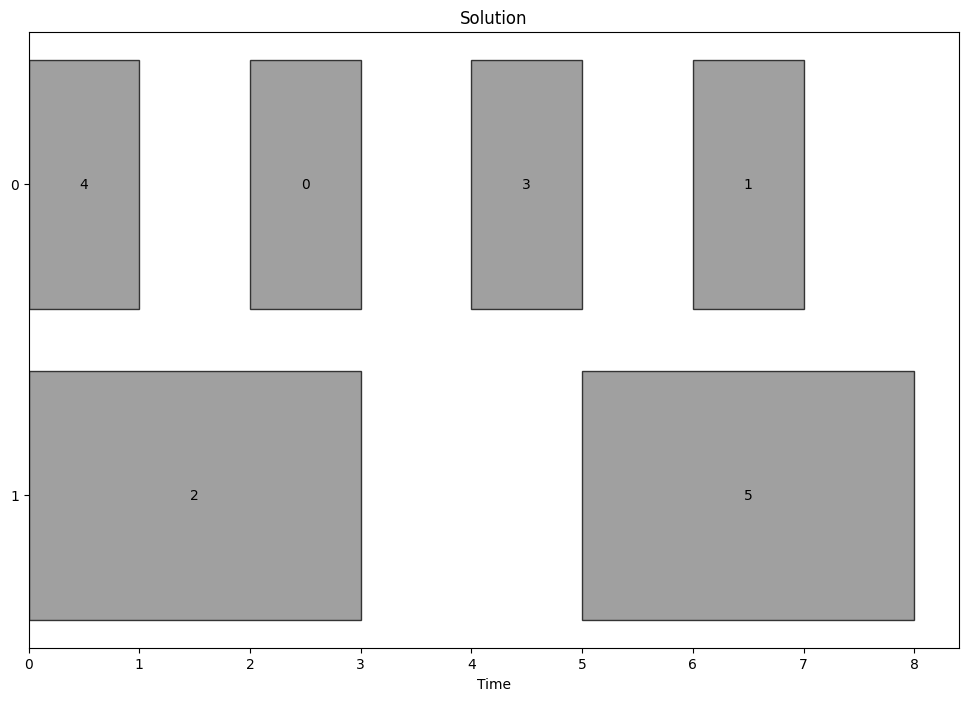

In [3]:
data = model.data()
plot(data, result.best, plot_labels=True)

### Notes
- Instances with sequence-depedent setup times are generally hard to solve, and it's even harder to solve to optimality. Consider using a time limit when solving such instances.
- Unlike CP Optimizer, OR-Tools does not have specialized constraints to deal with sequence-dependent setup times. This makes the implementation of OR-Tools substantially slower.